In [1]:
import matplotlib.pyplot as plt

# 基本绘图

## 面向对象方式绘图

In [2]:
# 准备数据
x = [-3, 5, 7]
y = [10, 2, 5]


## 状态接口方式绘图

In [3]:
# 准备数据
x = [-3, 5, 7]
y = [10, 2, 5]


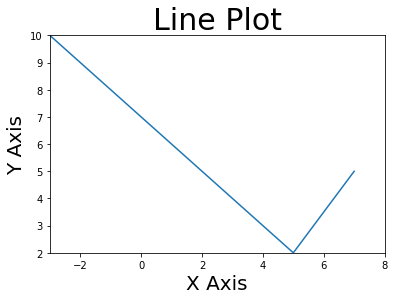

In [18]:
# 绘制折线图
plt.plot(x, y)

# 设置 x 轴、y 轴刻度
plt.xlim(-3, 8)
plt.ylim(2, 10)

# 设置 x 轴、y 轴标题
plt.xlabel('X Axis', size=20)
plt.ylabel('Y Axis', size=20)

# 设置图形标题
plt.title('Line Plot', size=30)

# 显示图形
plt.show()

## 面向对象方式绘图

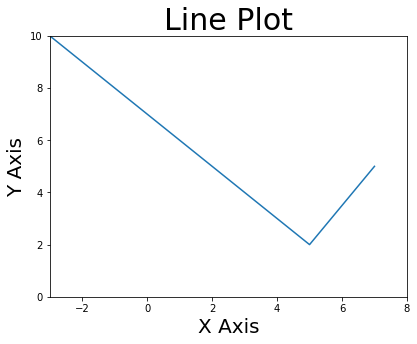

In [19]:
# 准备数据
x = [-3, 5, 7]
y = [10, 2, 5]

# 创建图(画布)
fig = plt.figure(figsize=(6.4, 4.8))

# 在图(画布)上添加坐标系
axes = fig.subplots(1, 1)

# 在坐标系上进行绘图
axes.plot(x, y)

# 设置坐标系 x 轴、y 轴刻度
axes.set_xlim(-3, 8)
axes.set_ylim(0, 10)

# 设置坐标系 x 轴、y轴标题
axes.set_xlabel('X Axis', fontsize=20)
axes.set_ylabel('Y Axis', fontsize=20)

# 设置坐标系标题
axes.set_title('Line Plot', fontsize=30)

# 显示图形
plt.show()

# 常见统计图形

**加载数据**

In [4]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 单变量图

### 直方图

**示例：查看客户消费金额 total_bill 的分布情况**

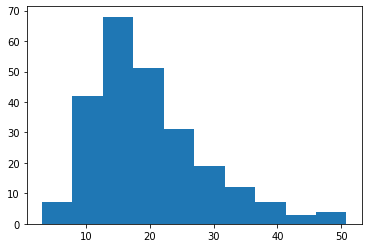

In [20]:
fig = plt.figure()
axes = fig.subplots(1, 1)
# 直方图
# bins=10：表示把数据分成几组，即将数据划分按顺序为几个区间
axes.hist(tips['total_bill'], bins=10)

# 显示图形
plt.show()

### 箱线图

**示例：查看客户消费金额 total_bill 的分布情况**

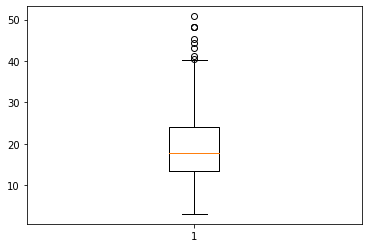

In [21]:
fig = plt.figure()
axes = fig.subplots(1, 1)
# 箱线图
axes.boxplot(tips['total_bill'])

# 显示图形
plt.show()

### 条形图

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**示例：按照 day(周几) 统计每天的消费数量**

In [23]:
result = tips['day'].value_counts()

<BarContainer object of 4 artists>

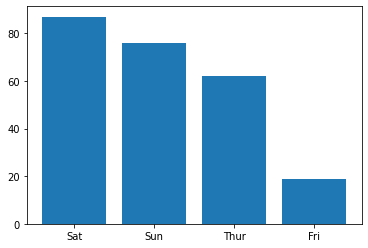

In [24]:
fig = plt.figure()
axes = fig.subplots(1, 1)
axes.bar(result.index, result.values)

### 饼图

**示例：按照 day(周几) 统计每天的消费数量**

In [26]:
day_counts = tips['day'].value_counts()

([<matplotlib.patches.Wedge at 0x7f88b87c4880>,
 [Text(0.47909423581850485, 0.990186201280084, 'Sat'),
  Text(-1.0967192869113325, -0.08489290734035711, 'Sun'),
  Text(0.3074340394718735, -1.0561649072820052, 'Thur'),
  Text(1.06724906774893, -0.2664196452760947, 'Fri')],
 [Text(0.26132412862827537, 0.5401015643345912, '35.7%'),
  Text(-0.598210520133454, -0.04630522218564932, '31.1%'),
  Text(0.16769129425738552, -0.5760899494265482, '25.4%'),
  Text(0.5821358551357799, -0.14531980651423346, '7.8%')])

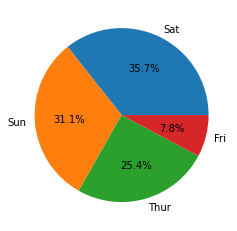

In [27]:
fig = plt.figure()
axes = fig.subplots(1, 1)
axes.pie(day_counts.values, labels=day_counts.index, autopct='%.1f%%')

## 双变量图

## 散点图

**示例：查看消费数据中消费tip随着消费金额total_bill的变化情况**

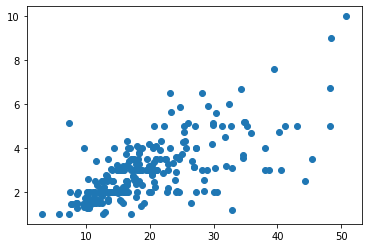

In [28]:
fig = plt.figure()
axes = fig.subplots(1, 1)

axes.scatter(tips['total_bill'], tips['tip'])

In [11]:
# 数据量很大
# 1. 先随机采样，然后用采样数据绘制散点图
# 2. 使用全数据绘制蜂巢图

## 蜂巢图

**示例：查看消费数据中消费tip随着消费金额total_bill的变化情况**

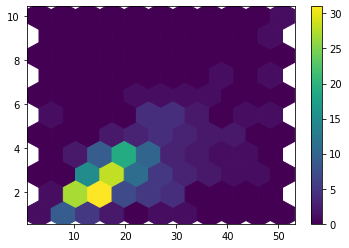

In [29]:
fig = plt.figure()
axes = fig.subplots(1, 1)

# axes.hexbin(x, y)：蜂巢图，指定x轴和y轴的数据
# gridsize=10：指定x轴方向上每一横行分几个格子
hb = axes.hexbin(tips['total_bill'], tips['tip'], gridsize=10)

# 添加图形右侧的颜色提示栏
fig.colorbar(hb, ax=axes)

## 条形图

**示例：按 day(周几) 统计每餐消费的平均值并进行可视化**

In [30]:
result = tips.groupby('day').total_bill.mean()

<BarContainer object of 4 artists>

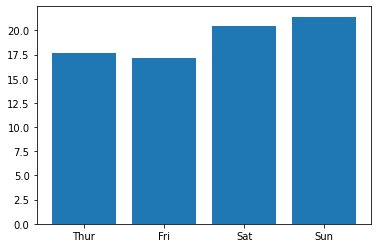

In [31]:
fig = plt.figure()
axes = fig.subplots(1, 1)

axes.bar(result.index, result.values)

## 折线图

**示例：按 day(周几) 统计每餐消费的平均值并进行可视化**

In [32]:
# 创建一个有序的分类数据类型
from pandas.api.types import CategoricalDtype

cat = CategoricalDtype(categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

# 将 day 这列数据转换为有序分类数据类型
tips['day'] = tips['day'].astype(cat)

# 按 day(周几) 统计每餐消费的平均值
result = tips.groupby('day').total_bill.mean()

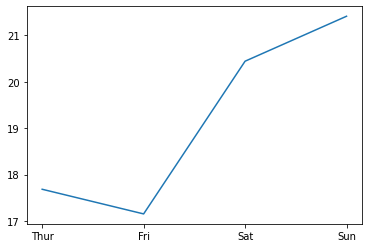

In [33]:
fig = plt.figure()
axes = fig.subplots(1, 1)

axes.plot(result.index, result.values)


# 多变量绘图

## 散点图

**示例：查看不同性别的消费客户中，消费tip随着消费金额total_bill的变化情况**

In [34]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)
tips

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [16]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


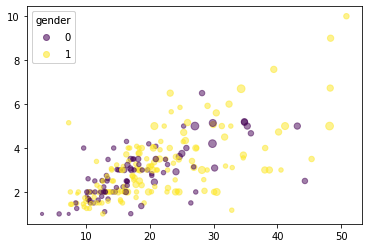

In [35]:
# 创建图和坐标系
fig = plt.figure()
axes = fig.subplots(1, 1)

# 散点图
# c：设置根据哪列数据将散点图分类，使用不同的颜色表示
scatter = axes.scatter(tips['total_bill'], tips['tip'], 
                       c=tips['sex_color'], s=tips['size'] * 10, alpha=0.5)

# 添加图例
legend = axes.legend(*scatter.legend_elements(), title='gender')
axes.add_artist(legend)

# 显示图形
plt.show()